# Logistic Regression

🎯 Up until now, you have been modelling a regression task. This time, you are going to be modelling a classification task, on the famous Titanic dataset.

👇 Load the `titanic.csv` dataset into this notebook as a pandas dataframe, and display its first 5 rows.

<details>
    <summary>💡Hint</summary>
    The dataset is located in a parent directory, you should use <code>../</code> in order to find it.
</details>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ℹ️ You can download a detailed description of the dataset [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Titanic_dataset_description.txt). Make sure to refer to it throughout the day.

In [2]:
titanic = pd.read_csv('../data/titanic.csv')
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.shape

(891, 12)

# 1. Model evaluation

👇 We want to predict whether a passenger survived (`Survived`) the Titanic disaster, according to the following features:

- The class in which she/he was travelling (`Pclass`)
- The number of siblings/spouses he had onboard (`SibSp`)
- The number of parents/children he had onboard (`Parch`)
- The fare he paid for the ticket (`Fare`)

❓How accurate would a LogisticRegression model be at such a task? Save the accuracy under variable name `accuracy`.

In [4]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

X = titanic[['Pclass','SibSp','Parch','Fare']]
y = titanic.Survived

model.fit(X,y)

LogisticRegression()

In [8]:
accuracy = model.score(X,y)
accuracy

0.6879910213243546

### ☑️ Check your code

In [9]:
from nbresult import ChallengeResult

result = ChallengeResult('accuracy',
                         accuracy = accuracy
)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.6, pytest-6.2.3, py-1.10.0, pluggy-0.13.1 -- /Users/smrack/.pyenv/versions/3.8.6/envs/lewagon/bin/python3.8
cachedir: .pytest_cache
rootdir: /Users/smrack/code/olushO/data-challenges/05-ML/01-Fundamentals-of-Machine-Learning/04-Logistic-Regression
plugins: anyio-2.2.0, dash-1.20.0
collecting ... collected 1 item

tests/test_accuracy.py::TestAccuracy::test_accuracy PASSED               [100%]

============================== 1 passed in 0.24s ===============================


💯 You can commit your code:

git add tests/accuracy.pickle

git commit -m 'Completed accuracy step'

git push origin master


# 2. In depth diagnosis

❓We've evaluated the accuracy of the model at predicting, but we want to investigate its performance in more depth. Is the model overfitting? underfitting? How many learning examples does it need to learn optimally on the given features?

In [14]:
from sklearn.model_selection import cross_validate, learning_curve

cv_results = cross_validate(model, X, y, cv=5)
cv_results

{'fit_time': array([0.03234506, 0.03812099, 0.02143097, 0.02199817, 0.01526093]),
 'score_time': array([0.00278783, 0.00230193, 0.00641418, 0.00293994, 0.00282001]),
 'test_score': array([0.61452514, 0.68539326, 0.6741573 , 0.70224719, 0.74157303])}

In [15]:
cv_score = cv_results['test_score'].mean()
cv_score

0.6835791852363318

/Users/smrack/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:1471: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes' 11 instead of 12).
  warnings.warn("Removed duplicate entries from 'train_sizes'. Number "
/Users/smrack/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/smrack/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/smrack/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1374, in fit
    raise ValueError("This solver ne

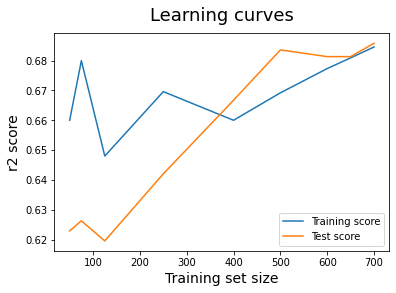

In [27]:
train_sizes = [10,25,50,75,125,250,400,500,500,600,650,700]

train_sizes, train_scores, test_scores = learning_curve(
    estimator=LogisticRegression(), X=X, y=y, train_sizes=train_sizes, cv=5)


train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend()


<details>
<summary> ℹ️ Once you have completed your diagnosis, unfold this cell </summary>   
    
<br/>
You should have plotted the learning curves.

👉 The curves should have converged:
- The model is not overfitting (no variance): it generalizes well.

👉 The test score stops increasing around 500 training observations:
- The model does not need more than 500 training observations to perform optimally on the given features.
    
</details>


# 3. Reduced training size

👇 Evaluate a model on the training size suggested by the curves. Are you able to maintain a similar accuracy? Save the new accuracy under variable name `reduced_training_accuracy`

In [37]:
X_reduced = X[:500].copy()
y_reduced = y[:500].copy()

model.fit(X_reduced,y_reduced)

reduced_training_accuracy = model.score(X_reduced,y_reduced)
reduced_training_accuracy

0.656

ℹ️ The accuracy should be the nearly the same, with a reduced computational expense.

### ☑️ Check your code

In [38]:
from nbresult import ChallengeResult

result = ChallengeResult('reduced_accuracy',
                         accuracy = reduced_training_accuracy
)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.6, pytest-6.2.3, py-1.10.0, pluggy-0.13.1 -- /Users/smrack/.pyenv/versions/3.8.6/envs/lewagon/bin/python3.8
cachedir: .pytest_cache
rootdir: /Users/smrack/code/olushO/data-challenges/05-ML/01-Fundamentals-of-Machine-Learning/04-Logistic-Regression
plugins: anyio-2.2.0, dash-1.20.0
collecting ... collected 1 item

tests/test_reduced_accuracy.py::TestReduced_accuracy::test_accuracy PASSED [100%]

============================== 1 passed in 0.28s ===============================


💯 You can commit your code:

git add tests/reduced_accuracy.pickle

git commit -m 'Completed reduced_accuracy step'

git push origin master


# 4. Predictions

❓ Did the following person survive the Titanic disaster?

- Travelled in class 1 (`Pclass`)
- Had no spouse or sibblings on board(`SibSp`)
- Had no parents or children on board (`Parch`)
- Paid 15 for his ticket (`Fare`)

⚠️ Make sure the model you use for predicting has the **least computational expense possible**. Save the prediction under variable name `prediction`.

In [40]:
prediction = model.predict([[1, 0, 0, 15]])
prediction

array([1])

❓ What is the probability that the person survived? Compute your answer and save it under variable name `probability`.

In [41]:
probability = model.predict_proba([[1, 0, 0, 15]])[0][1]
probability

0.5133385200560083

### ☑️ Check your code

In [42]:
from nbresult import ChallengeResult

result = ChallengeResult('predictions',
                         prediction = prediction,
                         probability = probability
)

result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.6, pytest-6.2.3, py-1.10.0, pluggy-0.13.1 -- /Users/smrack/.pyenv/versions/3.8.6/envs/lewagon/bin/python3.8
cachedir: .pytest_cache
rootdir: /Users/smrack/code/olushO/data-challenges/05-ML/01-Fundamentals-of-Machine-Learning/04-Logistic-Regression
plugins: anyio-2.2.0, dash-1.20.0
collecting ... collected 3 items

tests/test_predictions.py::TestPredictions::test_prediction_is_1 PASSED  [ 33%]
tests/test_predictions.py::TestPredictions::test_probability PASSED      [ 66%]
tests/test_predictions.py::TestPredictions::test_probability_type PASSED [100%]

============================== 3 passed in 0.30s ===============================


💯 You can commit your code:

git add tests/predictions.pickle

git commit -m 'Completed predictions step'

git push origin master


# 🏁